In [1]:
import pandas as pd
import numpy as np

In [2]:
import pandas as pd
# data = {
#     'id' :[1,2,4,None],
#     'Score' :[10,20,30,None] ,
# }
# data = {
#     'id' :[1,2,3,None],
#     'Score' :[10,20,30,None] ,
# }

data = {'id': [1,2, 3,None,None,5, 6], 'Score': [10, 20, 30, None, 50, 60,70]}
df = pd.DataFrame(data)
df

,id,Score
0,1.0,10.0
1,2.0,20.0
2,3.0,30.0
3,NaN,NaN
4,NaN,50.0
5,5.0,60.0
6,6.0,70.0


# Assignment 1 : fillup null values with avg of previous 3 values

Algorithms :  <br>
1)Verify if there are three valid values before a NaN in the dataset. <br>
2) find mean of those value <br>
3) replace nan with the mean value <br>








In [3]:
def fill_with_previous_3_values(df):
  nan_indices_id = df[df['id'].isna()].index
  nan_indices_score = df[df['Score'].isna()].index

  for idx in nan_indices_id:
    if idx > 2:
      values_before =  df.loc[:idx-1, 'id'].iloc[-3:].tolist()
      if(pd.isna(values_before).any())==False:
        mean = np.mean(values_before)
        df.loc[idx, 'id'] = mean  # Replace the NaN at 'id' index with mean value

  for idx in nan_indices_score:
    if idx > 2:
      values_before =  df.loc[:idx-1, 'Score'].iloc[-3:].tolist()
      if(pd.isna(values_before).any())==False:
        mean = np.mean(values_before)
        df.loc[idx, 'Score'] = mean

  return df


In [4]:
df = fill_with_previous_3_values(df)
df

,id,Score
0,1.000000,10.0
1,2.000000,20.0
2,3.000000,30.0
3,2.000000,20.0
4,2.333333,50.0
5,5.000000,60.0
6,6.000000,70.0


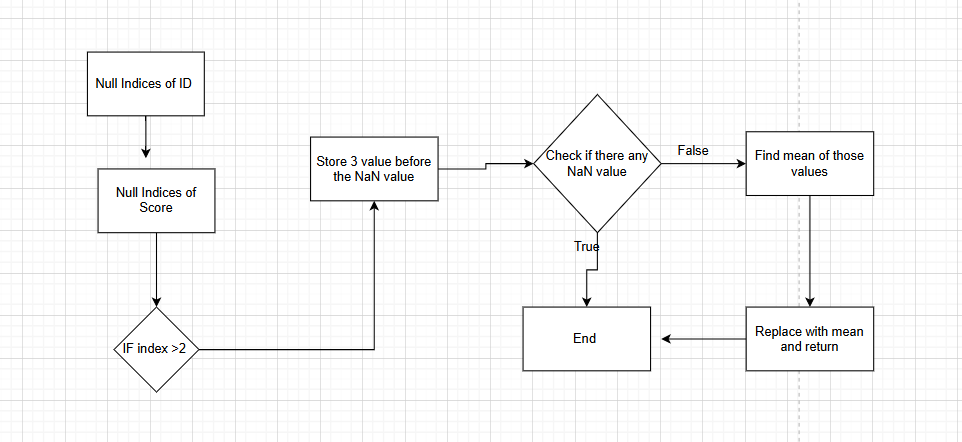

# Assignment : ffill with all previous value

In [14]:
df["ExpandingMean_id"] = df["id"].expanding().mean()
df["ExpandingMean_Score"] = df["Score"].expanding().mean()

nan_indices_id = df[df['id'].isna()].index
nan_indices_score = df[df['Score'].isna()].index


for idx in nan_indices_id:
  value= df['ExpandingMean_id'][idx]
  df.loc[idx,'id'] = value

for idx in nan_indices_score:
  value= df['ExpandingMean_Score'][idx]
  df.loc[idx,'Score'] = value


In [8]:
nan_indices_id

Index([3, 4], dtype='int64')

In [15]:
df

,id,Score,ExpandingMean_id,ExpandingMean_Score
0,1.0,10.0,1.0,10.0
1,2.0,20.0,1.5,15.0
2,3.0,30.0,2.0,20.0
3,2.0,20.0,2.0,20.0
4,2.0,50.0,2.0,27.5
5,5.0,60.0,2.5,34.0
6,6.0,70.0,3.0,40.0


## Assignment 2 : Interpolation

In [16]:
new_df = df.interpolate(method='linear')
new_df

,id,Score,ExpandingMean_id,ExpandingMean_Score
0,1.0,10.0,1.0,10.0
1,2.0,20.0,1.5,15.0
2,3.0,30.0,2.0,20.0
3,2.0,20.0,2.0,20.0
4,2.0,50.0,2.0,27.5
5,5.0,60.0,2.5,34.0
6,6.0,70.0,3.0,40.0


In [17]:
# polynomial

new_df = df.interpolate(method='polynomial',order=2)
new_df

,id,Score,ExpandingMean_id,ExpandingMean_Score
0,1.0,10.0,1.0,10.0
1,2.0,20.0,1.5,15.0
2,3.0,30.0,2.0,20.0
3,2.0,20.0,2.0,20.0
4,2.0,50.0,2.0,27.5
5,5.0,60.0,2.5,34.0
6,6.0,70.0,3.0,40.0


documentation :

1) What is .loc?
.loc is used to access rows and columns in a Pandas DataFrame by labels (index numbers or column names).

What is .iloc?
.iloc is used to select rows and columns by position (index number).

df.iloc[start:end]  # Selects rows from 'start' index to 'end' index (exclusive)


df.iloc[:-]


In Simple Terms:
.iloc[:-] means "all rows before the last one."
It does not include the last row in the selection.


start: The position from where you want to begin selecting rows.
end: The position where you want to stop selecting rows (exclusive), meaning it doesn't include the row at end.




### **General Syntax of `.iloc`**
```python
df.iloc[start:end]  # Selects rows from 'start' index to 'end' index (exclusive)
```
- `start`: The position from where you want to begin selecting rows.
- `end`: The position where you want to stop selecting rows **(exclusive)**, meaning it doesn't include the row at `end`.

---

### **What Does `iloc[:-]` Mean?**
```python
df.iloc[:-]
```
- The `:` means **take everything** (from the beginning to the end).
- The `-` in `[:-]` means **take all rows except the last one**.

### **In Simple Terms:**
- `.iloc[:-]` means **"all rows before the last one."**
  - It **does not include the last row** in the selection.

---

### **Example:**
#### **Given Data:**
```
Index   id
0       1.0
1       2.0
2       3.0
3       4.0
```

Using:
```python
df.iloc[:-1]
```

**Result:**
```
Index   id
0       1.0
1       2.0
2       3.0
```

- It selects **all rows except the last one** (`id = 4.0`).

---

### **Summary:**
- `iloc[:-]` selects all rows **except the last one**.
- It is commonly used when you want to **exclude the last row** of the DataFrame or series.






order=1: Linear interpolation (straight line).
order=2: Quadratic interpolation (parabola).
order=3: Cubic interpolation (smooth curve).